In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import geemap

In [2]:
# Directorio de la carpeta que deseas explorar
carpeta = 'RF_Stats'

# Lista para almacenar los nombres de los archivos shape
archivos_shape = []

# Recorre todos los archivos y carpetas dentro de la carpeta
for archivo in os.listdir(carpeta):
    # Verifica si el archivo es un archivo shape
    if archivo.endswith('.shp'):
        # Agrega el nombre del archivo a la lista
        archivos_shape.append(archivo)

# Imprime la lista de archivos shape encontrados
archivos_shape;

In [3]:
len(archivos_shape[0])

43

In [4]:
Etiqueta= []
for i in archivos_shape:
    Etiqueta.append(i[17:-4])
Etiqueta

['CanOE_ssp126_2021-2040',
 'CanOE_ssp126_2041-2060',
 'CanOE_ssp126_2061-2080',
 'CanOE_ssp370_2021-2040',
 'CanOE_ssp370_2041-2060',
 'CanOE_ssp370_2061-2080',
 'GDFL_ssp126_2021-2040',
 'GDFL_ssp126_2041-2060',
 'GDFL_ssp126_2061-2080',
 'GDFL_ssp370_2021-2040',
 'GDFL_ssp370_2041-2060',
 'GDFL_ssp370_2061-370']

In [5]:
ls=[]
for i in archivos_shape:
    ls.append('C:/Users/egonz/Documents/Servicio INIFAP/MainMunsProd/PyGeo_SS/RF_Stats/'+i)
ls; 

In [6]:
# Lista para almacenar las variables asignadas
variables = []

# Aplicar gpd.read_file() a cada elemento y asignar a una variable distinta
for i, archivo in enumerate(ls):
    variable = gpd.read_file(archivo)
    variables.append(variable)

# Imprimir la lista de variables asignadas
variables;

In [7]:
actual= gpd.read_file('C:/Users/egonz/Documents/Servicio INIFAP/MaizEdo/RF_Class_Actual.shp')
actual;

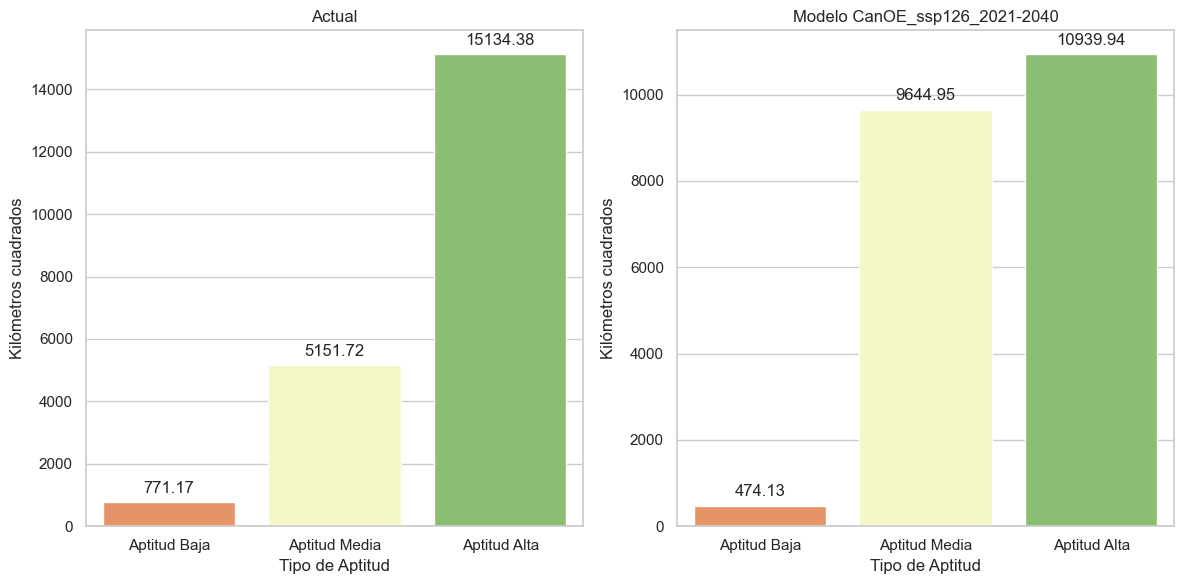

In [8]:
# Calcular las sumas totales de las columnas y almacenar los resultados para actual
actualBaja = actual['Class_2'].sum() + actual['Class_3'].sum()
actualMedia = actual['Class_4'].sum() + actual['Class_5'].sum() + actual['Class_6'].sum()
actualAlta = actual['Class_7'].sum() + actual['Class_8'].sum() + actual['Class_9'].sum()

# Calcular las sumas totales de las columnas y almacenar los resultados para variables[0]
suma_aptitud_baja_1 = variables[0]['Class_2'].sum() + variables[0]['Class_3'].sum()
suma_aptitud_media_1 = variables[0]['Class_4'].sum() + variables[0]['Class_5'].sum() + variables[0]['Class_6'].sum()
suma_aptitud_alta_1 = variables[0]['Class_7'].sum() + variables[0]['Class_8'].sum() + variables[0]['Class_9'].sum()

# Crear listas con las etiquetas y las sumas totales para variables[0]
etiquetasActual = ['Aptitud Baja', 'Aptitud Media', 'Aptitud Alta']
sumas_totales_Actual = [actualBaja, actualMedia, actualAlta]

# Crear listas con las etiquetas y las sumas totales para variables[1]
etiquetas_1 = ['Aptitud Baja', 'Aptitud Media', 'Aptitud Alta']
sumas_totales_1 = [suma_aptitud_baja_1, suma_aptitud_media_1, suma_aptitud_alta_1]

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear la figura con dos subplots
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

# Crear la gráfica de barras para variables[0]
sns.barplot(x=etiquetasActual, y=sumas_totales_Actual, palette="RdYlGn", ax=ax0)
ax0.set_title('Actual')
ax0.set_ylabel('Kilómetros cuadrados')
ax0.set_xlabel('Tipo de Aptitud')

# Añadir etiquetas a las barras para variables[0]
for p in ax0.patches:
    ax0.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Crear la gráfica de barras para variables[1]
sns.barplot(x=etiquetas_1, y=sumas_totales_1, palette="RdYlGn", ax=ax1)
ax1.set_title('Modelo'+' '+f'{Etiqueta[0]}')
ax1.set_ylabel('Kilómetros cuadrados')
ax1.set_xlabel('Tipo de Aptitud')

# Añadir etiquetas a las barras para variables[1]
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar las gráficas
plt.show()

###### Hide

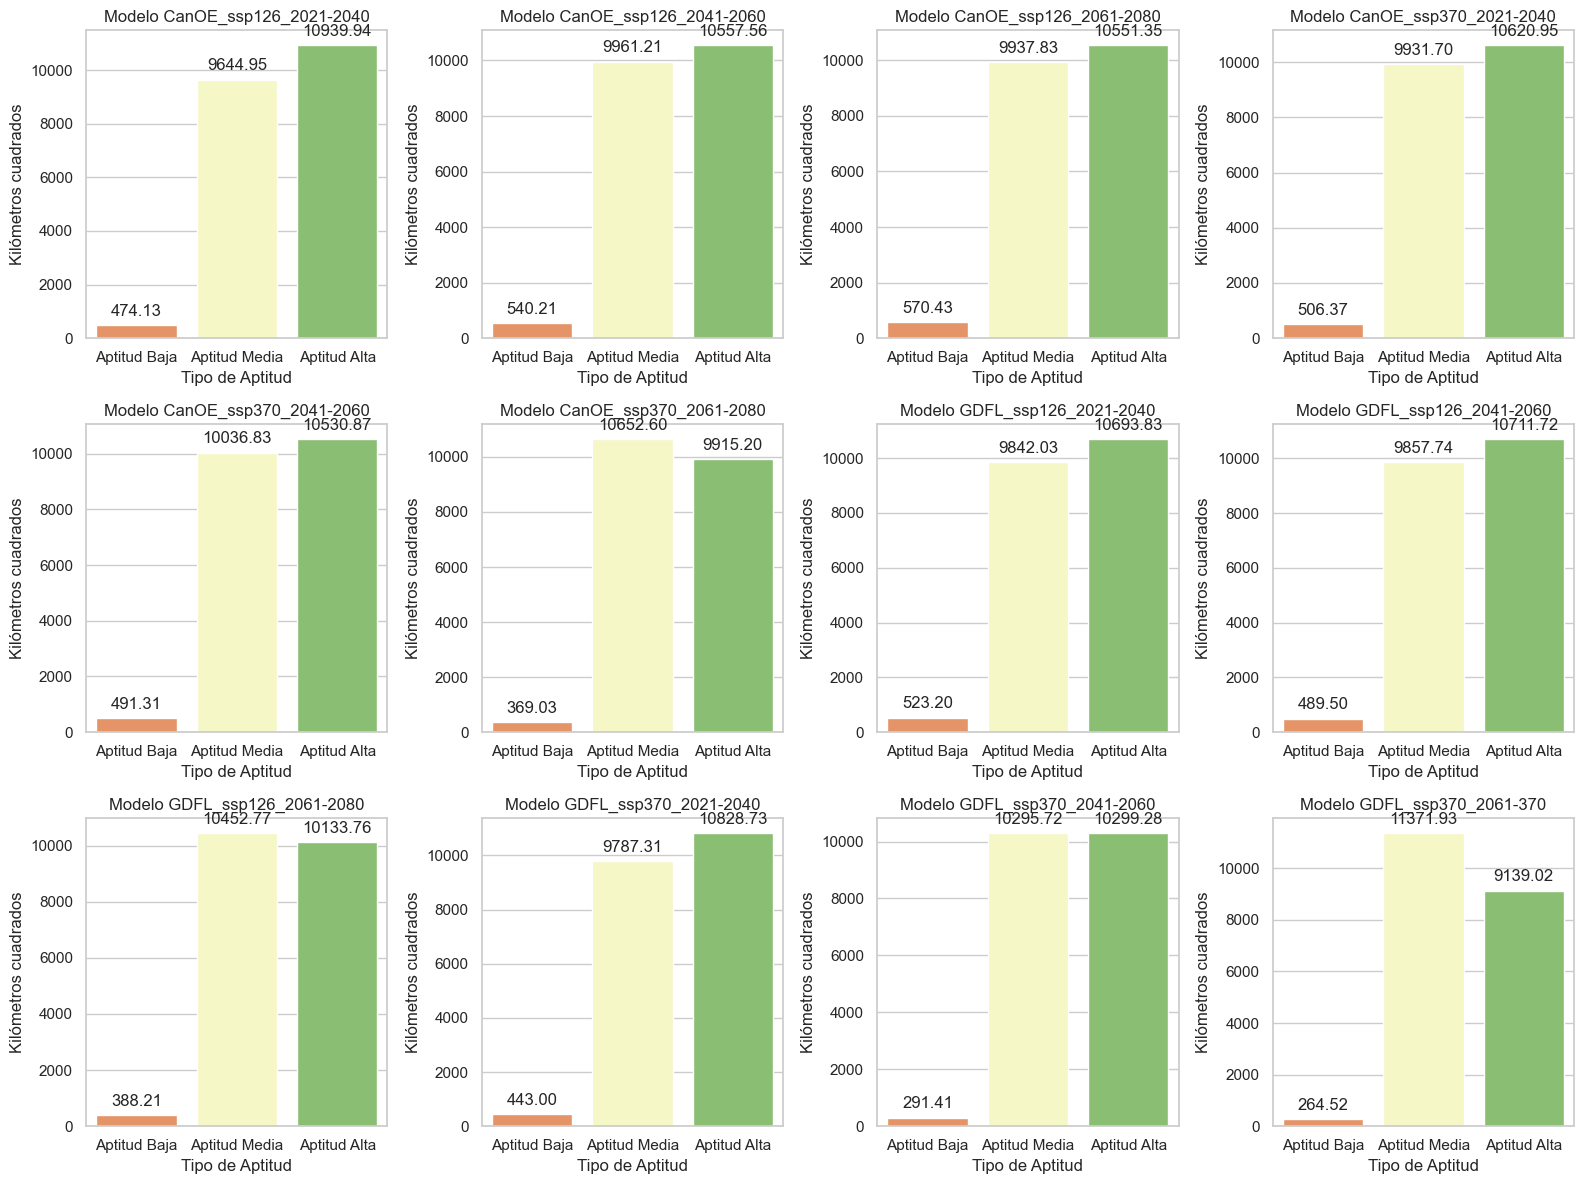

In [9]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear la figura con subplots
fig, axs = plt.subplots(3, 4, figsize=(16, 12))
axs = axs.flatten()

# Iterar sobre los dataframes en la lista variables
for i, df in enumerate(variables):
    # Calcular las sumas totales de las columnas para el dataframe actual
    actualBaja = df['Class_2'].sum() + df['Class_3'].sum()
    actualMedia = df['Class_4'].sum() + df['Class_5'].sum() + df['Class_6'].sum()
    actualAlta = df['Class_7'].sum() + df['Class_8'].sum() + df['Class_9'].sum()

    # Crear listas con las etiquetas y las sumas totales para el dataframe actual
    etiquetasActual = ['Aptitud Baja', 'Aptitud Media', 'Aptitud Alta']
    sumas_totales_Actual = [actualBaja, actualMedia, actualAlta]

    # Crear la gráfica de barras para el dataframe actual
    sns.barplot(x=etiquetasActual, y=sumas_totales_Actual, palette="RdYlGn", ax=axs[i])
    axs[i].set_title('Modelo' + ' ' + f'{Etiqueta[i]}')
    axs[i].set_ylabel('Kilómetros cuadrados')
    axs[i].set_xlabel('Tipo de Aptitud')

    # Añadir etiquetas a las barras
    for p in axs[i].patches:
        axs[i].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar las gráficas
plt.show()


# AQui

In [ ]:
# 1. Calcular las sumas totales de las columnas y almacenar los resultados para actual
# 2. Calcular las sumas totales de las columnas y almacenar los resultados para los dataframes 
# 3. Crear listas con las etiquetas y las sumas totales para actual
# 4. Crear listas con las etiquetas y las sumas totales para los dataframes
# 5. Configurar el estilo de Seaborn
# 6. Crear la figura con dos subplots
# 7. Crear la gráfica de barras para actual
# 8. Añadir etiquetas a las barras para actual
# 9. Crear la gráfica de barras para los dataframes
# 10. Añadir etiquetas a las barras para los dataframes
# 11. Ajustar espaciado entre subplots
# 12. Mostrar las gráficas

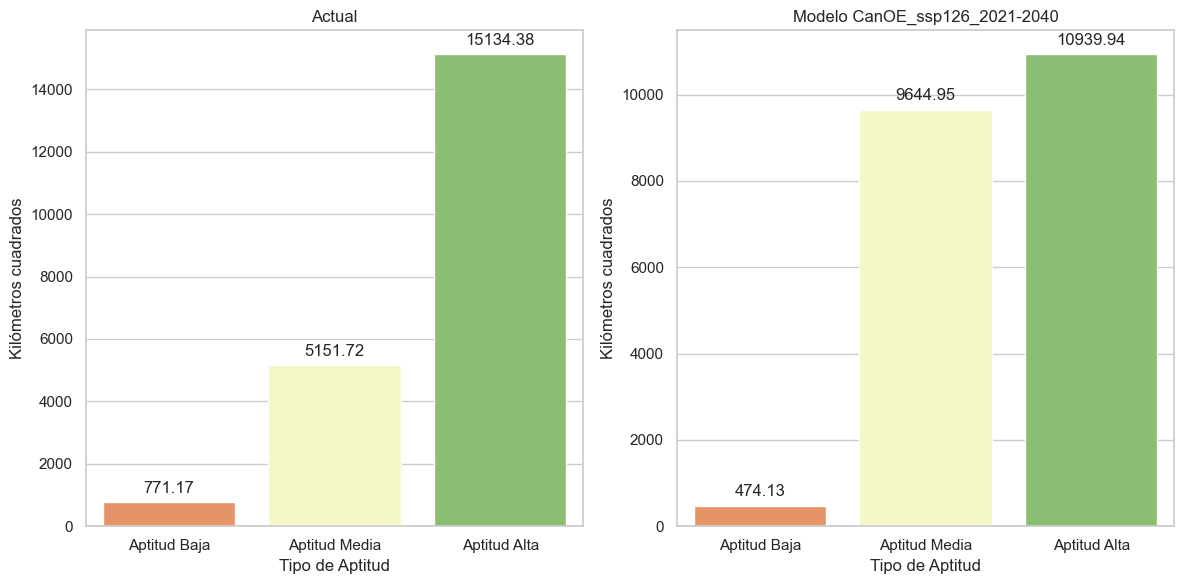

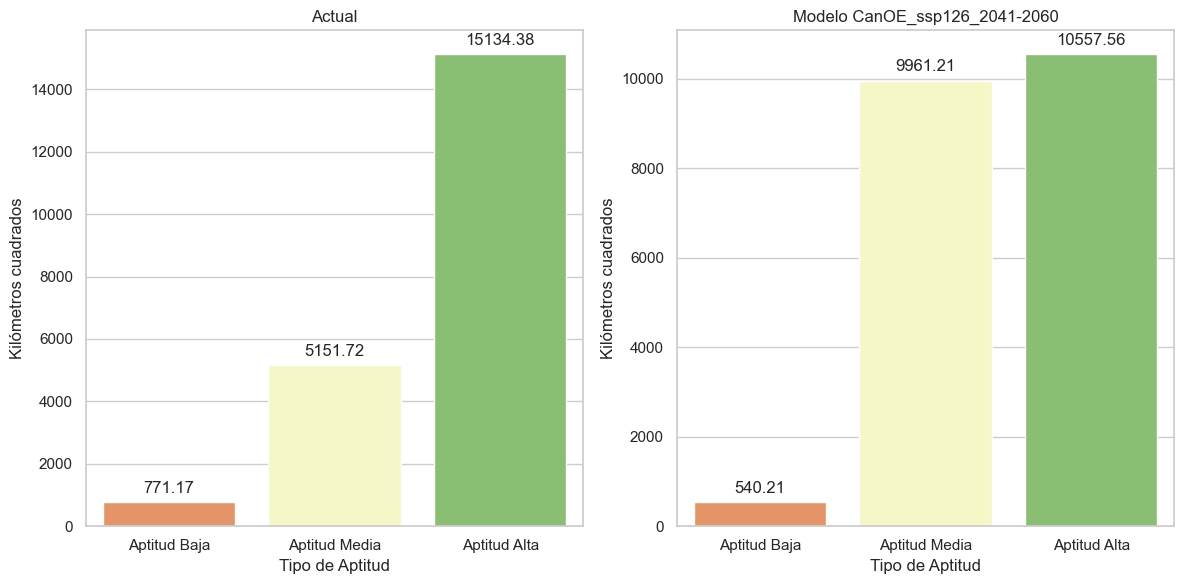

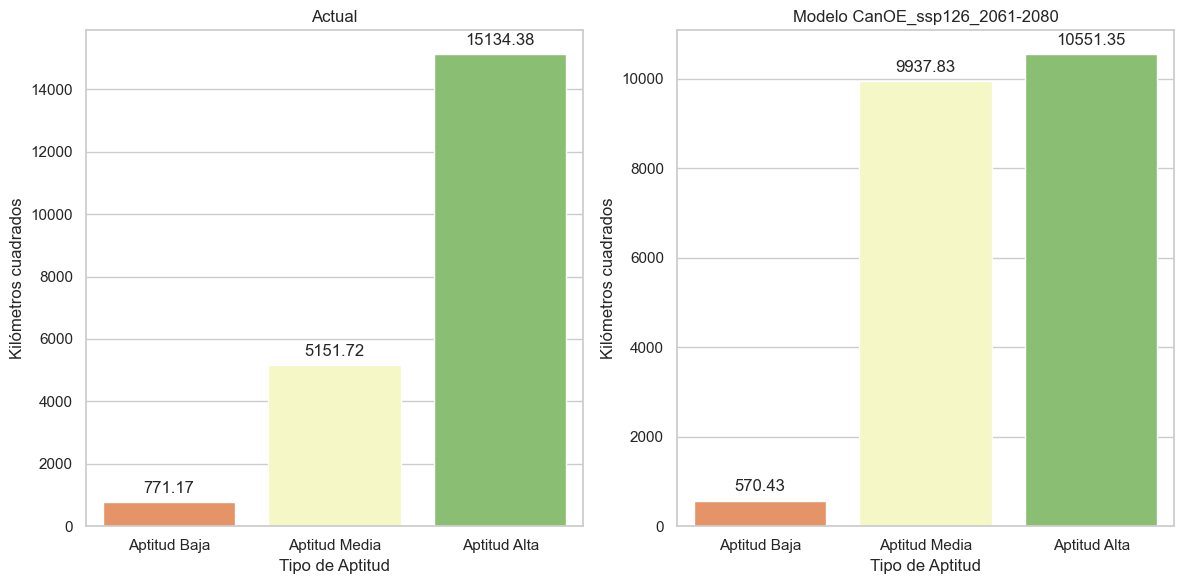

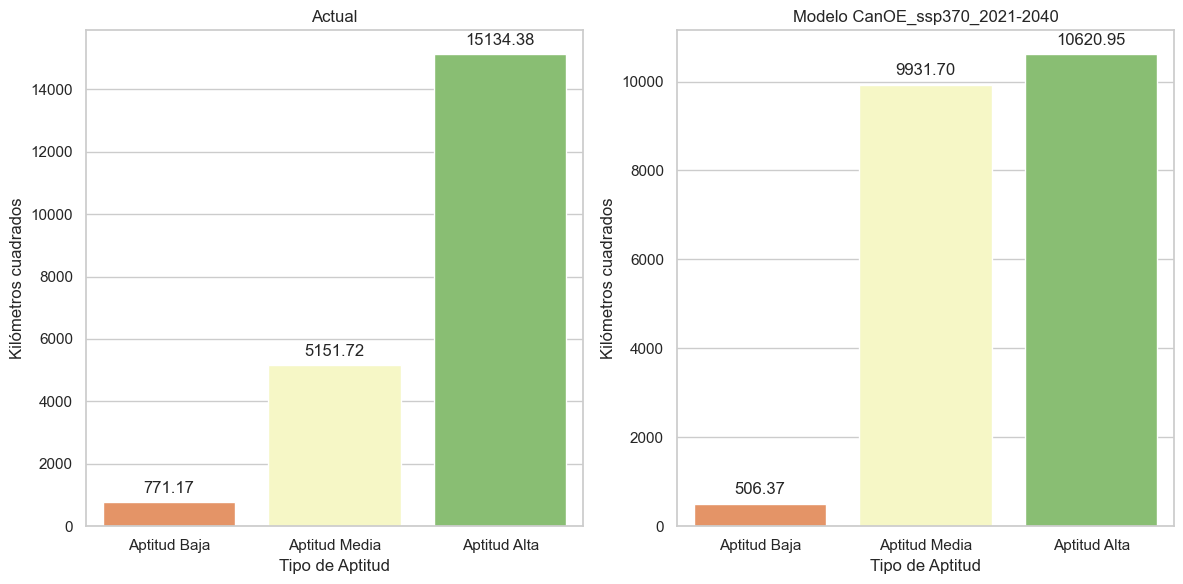

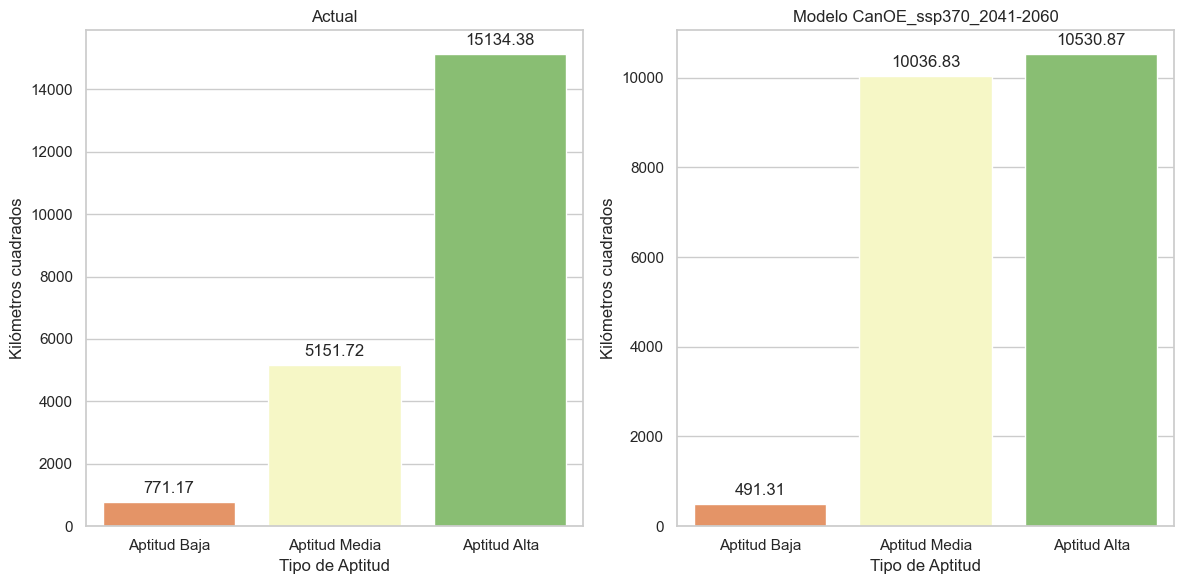

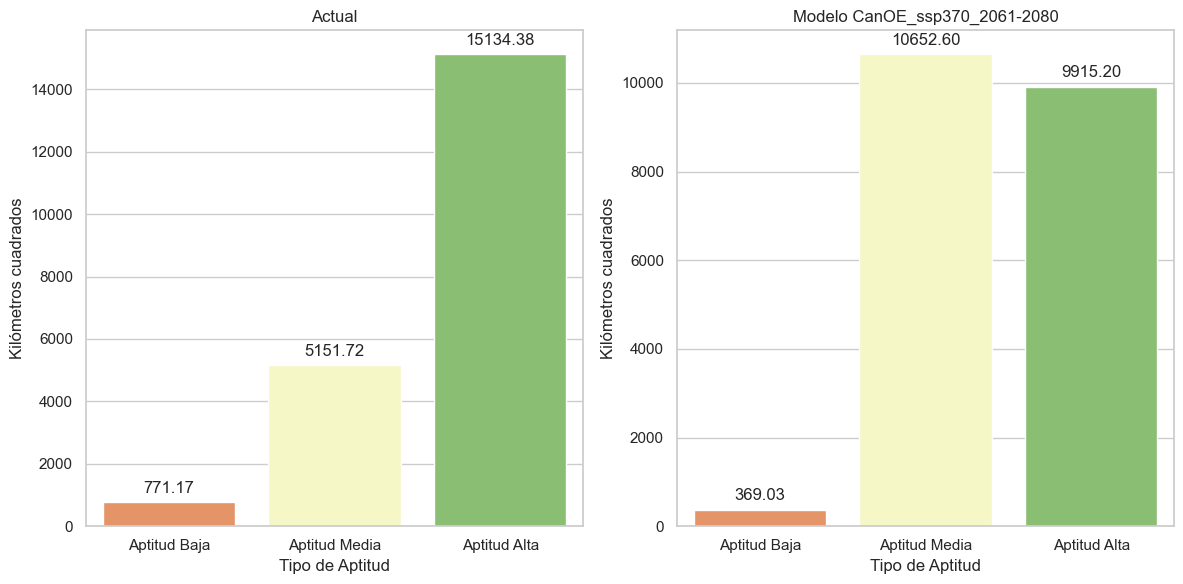

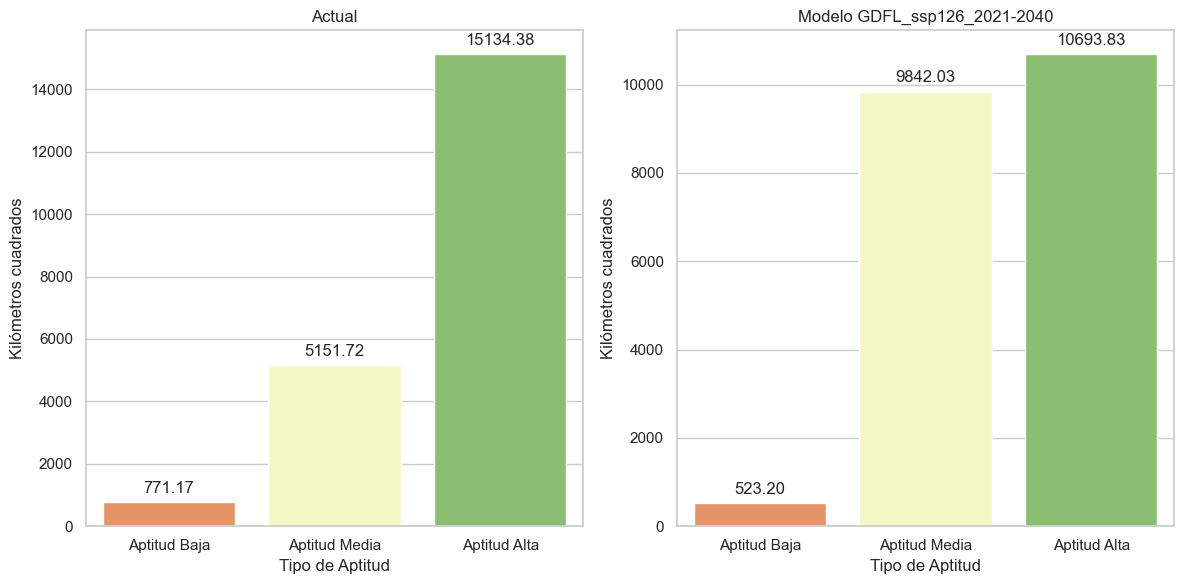

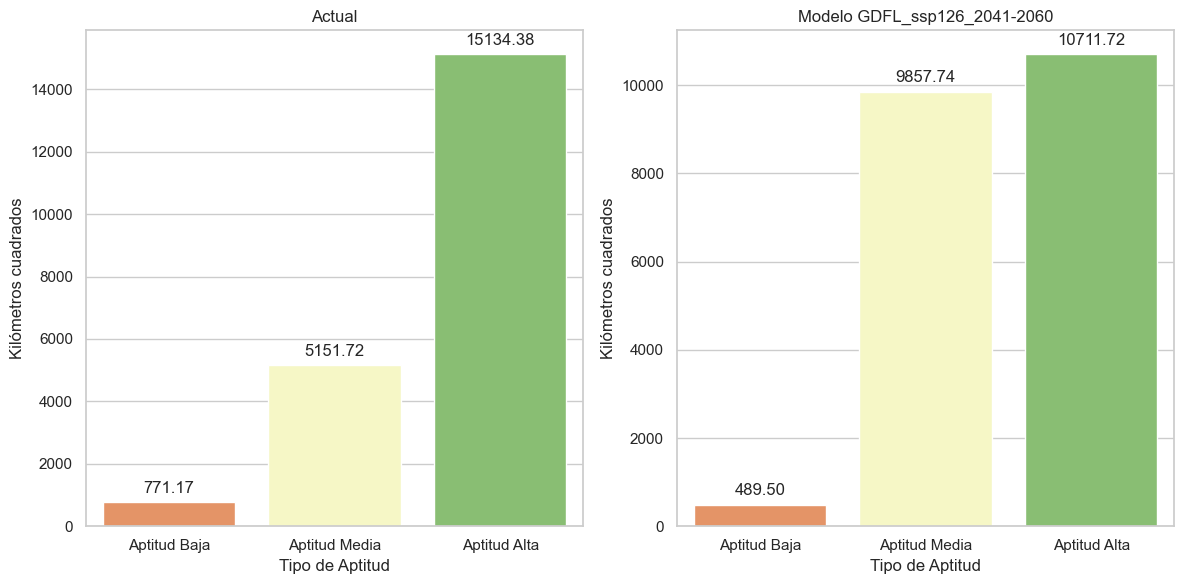

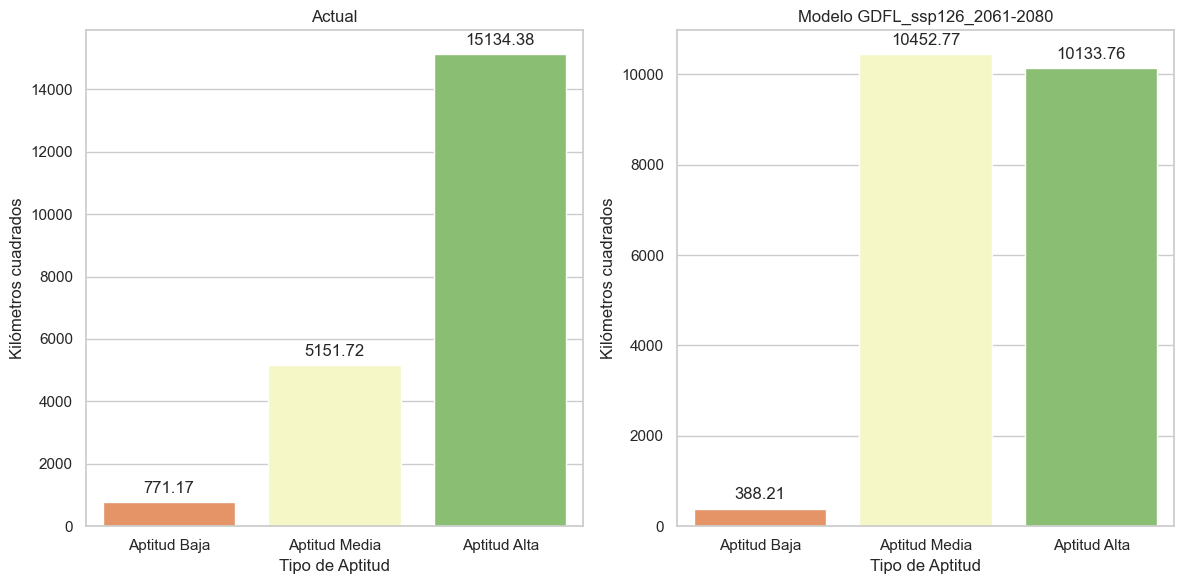

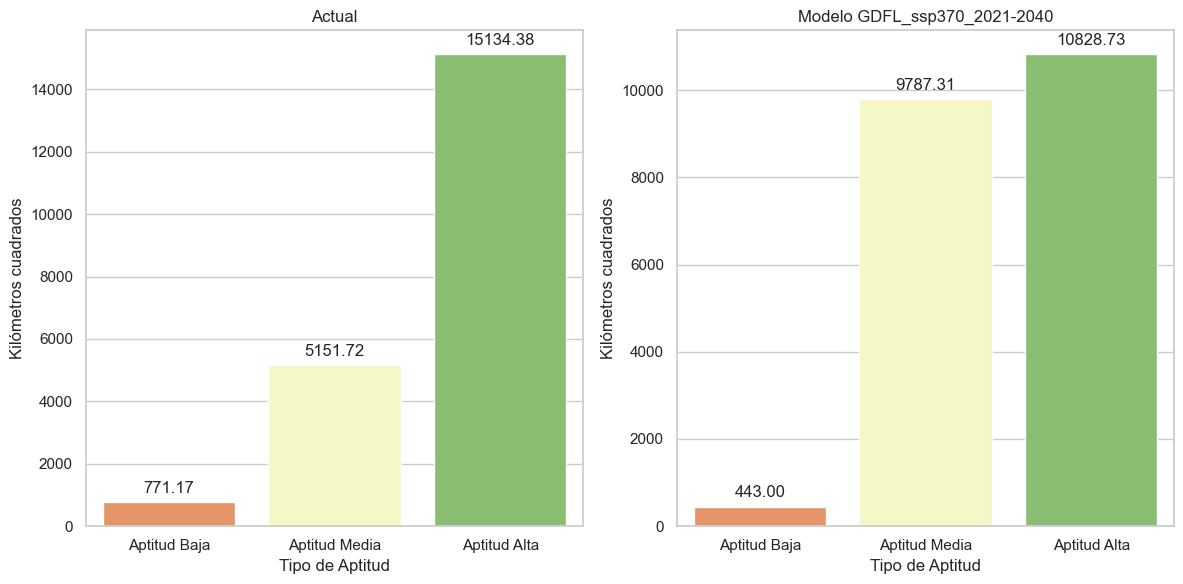

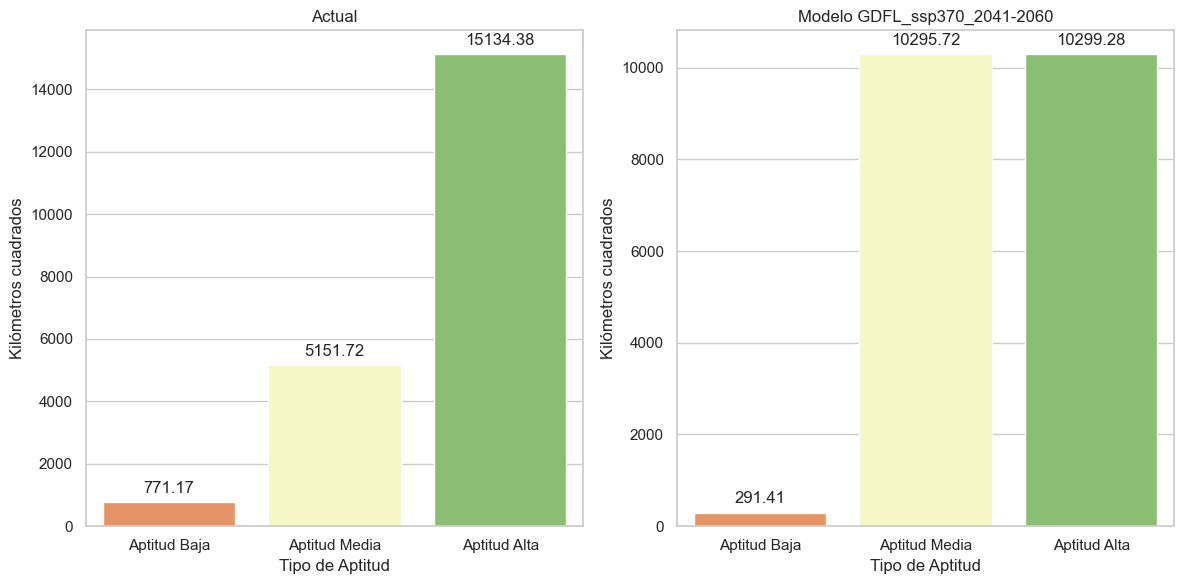

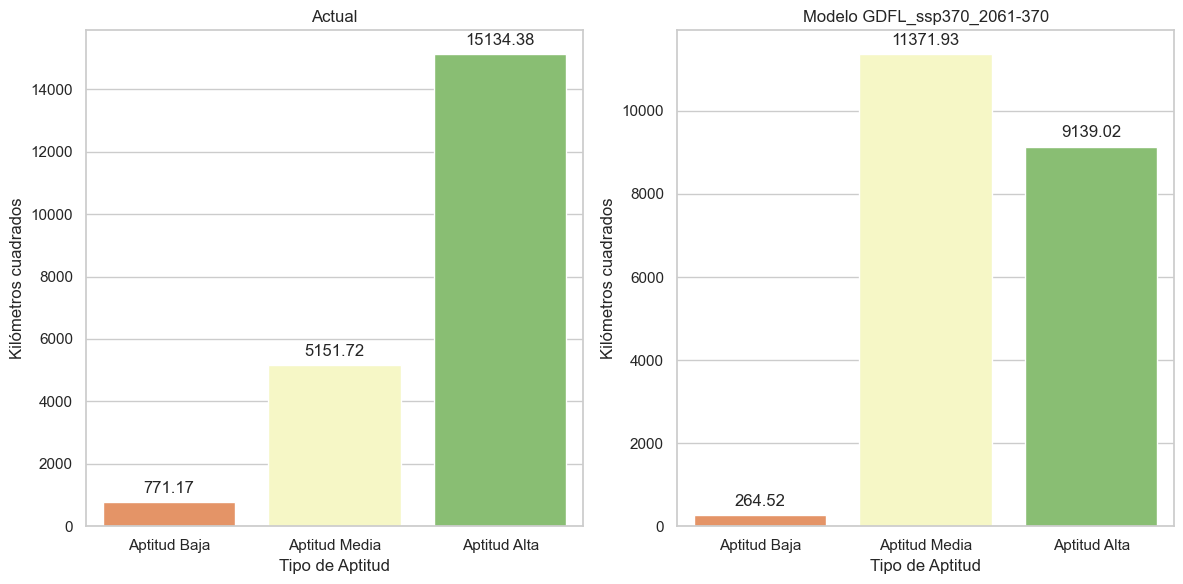

In [35]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear listas con las etiquetas y las sumas totales para 'actual'
etiquetasActual = ['Aptitud Baja', 'Aptitud Media', 'Aptitud Alta']
sumas_totales_Actual = [actualBaja, actualMedia, actualAlta]

# Iterar por cada dataframe en la lista 'variables'
for i, df in enumerate(variables):
    # Calcular las sumas totales de las columnas y almacenar los resultados
    aptitud_baja = df['Class_2'].sum() + df['Class_3'].sum()
    aptitud_media = df['Class_4'].sum() + df['Class_5'].sum() + df['Class_6'].sum()
    aptitud_alta = df['Class_7'].sum() + df['Class_8'].sum() + df['Class_9'].sum()

    # Crear listas con las etiquetas y las sumas totales
    etiquetas = ['Aptitud Baja', 'Aptitud Media', 'Aptitud Alta']
    sumas_totales = [aptitud_baja, aptitud_media, aptitud_alta]

    # Crear la figura con dos subplots
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

    # Crear la gráfica de barras para 'actual'
    sns.barplot(x=etiquetasActual, y=sumas_totales_Actual, palette="RdYlGn", ax=ax0)
    ax0.set_title('Actual')
    ax0.set_ylabel('Kilómetros cuadrados')
    ax0.set_xlabel('Tipo de Aptitud')

    # Añadir etiquetas a las barras para 'actual'
    for p in ax0.patches:
        ax0.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Crear la gráfica de barras para variables[i]
    sns.barplot(x=etiquetas, y=sumas_totales, palette="RdYlGn", ax=ax1)
    ax1.set_title('Modelo'+' '+f'{Etiqueta[i]}')
    ax1.set_ylabel('Kilómetros cuadrados')
    ax1.set_xlabel('Tipo de Aptitud')

    # Añadir etiquetas a las barras para variables[i]
    for p in ax1.patches:
        ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Ajustar espaciado entre subplots
    plt.tight_layout()

    # Guardar la figura en un archivo
    fig.savefig(f'output_{i}.png')

    # Mostrar las gráficas
    plt.show()

In [4]:
os.chdir('C:/Users/egonz/Documents/Servicio INIFAP/MainMunsProd/PyGeo_SS/TIF4Stats')
archivos = os.listdir()
archivos_tif = [archivo for archivo in archivos if os.path.splitext(archivo)[1] == '.tif']
archivos_tif

['RF_Class_MaizEdo_CanOE_ssp126_2021-2040.tif',
 'RF_Class_MaizEdo_CanOE_ssp126_2041-2060.tif',
 'RF_Class_MaizEdo_CanOE_ssp126_2061-2080.tif',
 'RF_Class_MaizEdo_CanOE_ssp370_2021-2040.tif',
 'RF_Class_MaizEdo_CanOE_ssp370_2041-2060.tif',
 'RF_Class_MaizEdo_CanOE_ssp370_2061-2080.tif',
 'RF_Class_MaizEdo_GDFL_ssp126_2021-2040.tif',
 'RF_Class_MaizEdo_GDFL_ssp126_2041-2060.tif',
 'RF_Class_MaizEdo_GDFL_ssp126_2061-2080.tif',
 'RF_Class_MaizEdo_GDFL_ssp370_2021-2040.tif',
 'RF_Class_MaizEdo_GDFL_ssp370_2041-2060.tif',
 'RF_Class_MaizEdo_GDFL_ssp370_2061-370.tif']

In [6]:
import ee
ee.Initialize()

In [13]:
edom= 'C:/Users/egonz/Documents/Servicio INIFAP/MaizEdo/Insumos/Edomex.shp'

In [15]:
ls=[]
output= 'C:/Usersegonz/Documents/Servicio INIFAP/MainMunsProd/PyGeo_SS/TIF4Stats/Raster_RF_Clip/'
for i in archivos_tif:
    ls.append(output+i)
ls

['C:/Usersegonz/Documents/Servicio INIFAP/MainMunsProd/PyGeo_SS/TIF4Stats/Raster_RF_Clip/RF_Class_MaizEdo_CanOE_ssp126_2021-2040.tif',
 'C:/Usersegonz/Documents/Servicio INIFAP/MainMunsProd/PyGeo_SS/TIF4Stats/Raster_RF_Clip/RF_Class_MaizEdo_CanOE_ssp126_2041-2060.tif',
 'C:/Usersegonz/Documents/Servicio INIFAP/MainMunsProd/PyGeo_SS/TIF4Stats/Raster_RF_Clip/RF_Class_MaizEdo_CanOE_ssp126_2061-2080.tif',
 'C:/Usersegonz/Documents/Servicio INIFAP/MainMunsProd/PyGeo_SS/TIF4Stats/Raster_RF_Clip/RF_Class_MaizEdo_CanOE_ssp370_2021-2040.tif',
 'C:/Usersegonz/Documents/Servicio INIFAP/MainMunsProd/PyGeo_SS/TIF4Stats/Raster_RF_Clip/RF_Class_MaizEdo_CanOE_ssp370_2041-2060.tif',
 'C:/Usersegonz/Documents/Servicio INIFAP/MainMunsProd/PyGeo_SS/TIF4Stats/Raster_RF_Clip/RF_Class_MaizEdo_CanOE_ssp370_2061-2080.tif',
 'C:/Usersegonz/Documents/Servicio INIFAP/MainMunsProd/PyGeo_SS/TIF4Stats/Raster_RF_Clip/RF_Class_MaizEdo_GDFL_ssp126_2021-2040.tif',
 'C:/Usersegonz/Documents/Servicio INIFAP/MainMunsProd/P

In [26]:
print(len(ls[0]))

130


In [37]:
out=[]
for i in ls:
    out.append(f'MunClip_{i[87:]}')
out

['MunClip_RF_Class_MaizEdo_CanOE_ssp126_2021-2040.tif',
 'MunClip_RF_Class_MaizEdo_CanOE_ssp126_2041-2060.tif',
 'MunClip_RF_Class_MaizEdo_CanOE_ssp126_2061-2080.tif',
 'MunClip_RF_Class_MaizEdo_CanOE_ssp370_2021-2040.tif',
 'MunClip_RF_Class_MaizEdo_CanOE_ssp370_2041-2060.tif',
 'MunClip_RF_Class_MaizEdo_CanOE_ssp370_2061-2080.tif',
 'MunClip_RF_Class_MaizEdo_GDFL_ssp126_2021-2040.tif',
 'MunClip_RF_Class_MaizEdo_GDFL_ssp126_2041-2060.tif',
 'MunClip_RF_Class_MaizEdo_GDFL_ssp126_2061-2080.tif',
 'MunClip_RF_Class_MaizEdo_GDFL_ssp370_2021-2040.tif',
 'MunClip_RF_Class_MaizEdo_GDFL_ssp370_2041-2060.tif',
 'MunClip_RF_Class_MaizEdo_GDFL_ssp370_2061-370.tif']

In [38]:
# Recortar cada archivo .tif en la región definida
for i, imagen_entrada in enumerate(ls):
    # Definir la ruta del archivo de máscara
    mascara = "C:/Users/egonz/Documents/Servicio INIFAP/MaizEdo/Insumos/Edomex.shp"  # Reemplaza con la ruta correcta de tu archivo de máscara
    # Recortar la imagen utilizando la máscara
    geemap.clip_image(imagen_entrada, mascara, out[i])

In [23]:
raster= ls[0]

In [24]:
raster

'C:/Usersegonz/Documents/Servicio INIFAP/MainMunsProd/PyGeo_SS/TIF4Stats/Raster_RF_Clip/RF_Class_MaizEdo_CanOE_ssp126_2021-2040.tif'

In [25]:
edom

'C:/Users/egonz/Documents/Servicio INIFAP/MaizEdo/Insumos/Edomex.shp'

In [ ]:
# Ruta de la carpeta que contiene los archivos .tif
carpeta_tif = "ruta/a/la/carpeta"

# Cargar la lista de archivos .tif
archivos_tif = geemap.get_file_list(folder=carpeta_tif, pattern="*.tif")

# Definir la región de recorte
region = geemap.Map().draw_last_feature

# Recortar cada archivo .tif en la región definida
for archivo_tif in archivos_tif:
    recorte = geemap.crop_image(archivo_tif, region)
    # Guardar el archivo recortado
    geemap.ee_export_image(recorte, filename=archivo_tif.replace(".tif", "_recortado.tif"), scale=30)
